# **Exploratory Data Analysis for Orders & Customers**

Sub-Text for heading: to be added after finishing this file.

## **0. EDA for Orders & Customers Summary**

- summary
- in
- points

## **1. Import Libraries**

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## **2. Import Data**

In [54]:
date_cols = ["order_purchase_timestamp", "order_approved_at", "order_delivered_timestamp", "order_estimated_delivery_date"]

orders = pd.read_csv('../data/processed/orders.csv')
orders[date_cols] = orders[date_cols].apply(pd.to_datetime, errors='coerce')  # Safely parse all, fallback if weird values

orders["delivery_time_gap"] = pd.to_timedelta(orders["delivery_time_gap"], errors='coerce')

order_items = pd.read_csv('../data/processed/order_items.csv')
customers = pd.read_csv('../data/processed/customers.csv')
payments = pd.read_csv('../data/processed/payments.csv')
products = pd.read_csv('../data/processed/products.csv')

## **3. Insight Sections**

### **📦 Orders & Delivery Trends**
**|** *Understand platform reliability, seasonality, and logistics performance.*

- description
- of the
- orders & delivery trends

Thought we can do this:
- Order status distribution: Show fulfillment health (delivered, canceled, etc.).
- Monthly/Weekly order volume: Spot trends, holidays, campaigns.
- Approval & delivery delays: Use gaps to showcase inefficiencies or smooth flows.
- Delivery vs estimated: Highlight over/under delivery trends (great use of your custom feature!).
- Delivery duration by region: Map delivery times by state/city ( geospatial + logistics insight).
- Order Timeline Visuals (Gantt style){ai suggested this one} lets see what we can do about this

#### **Order Status Distribution**

We first look at the distribution of order statuses to understand how the platform performs based on current status of orders data. The order status distribution shows that `delivered` status is very dominant, overshadowing other non-delivered statuses. Hence, the plot is splitted into two—one including all statuses and one zoomed into non-delivered statuses for better comparison and to show the other statuses properly in a balanced view.

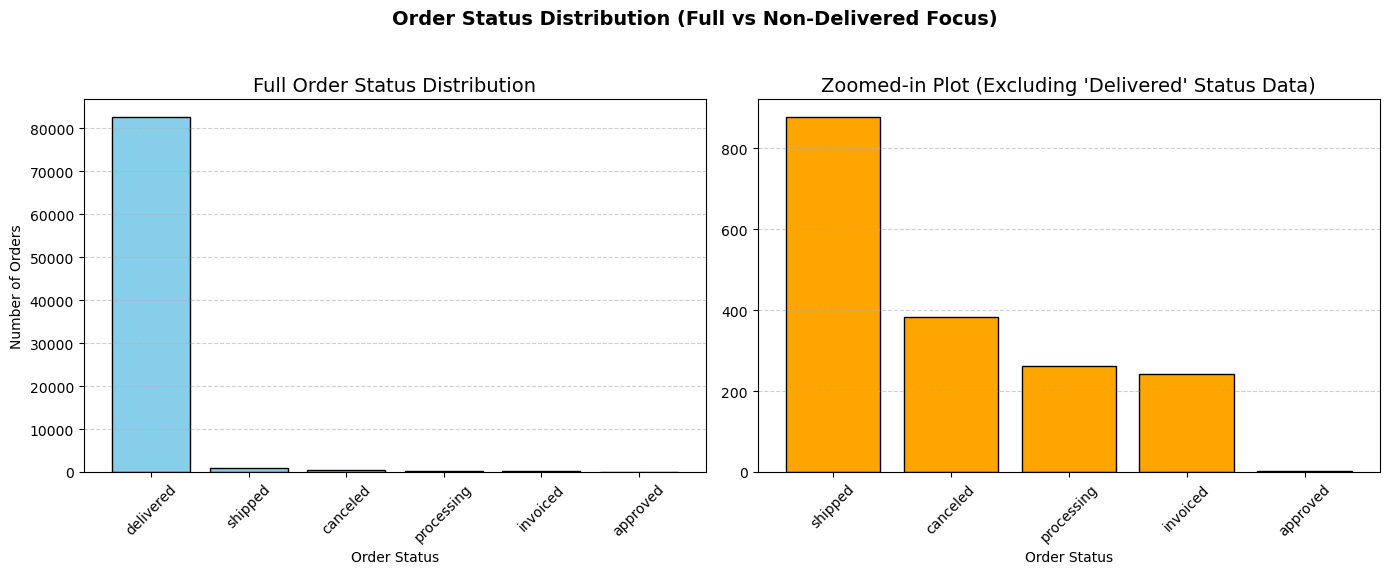

In [55]:
status_value_counts = orders['order_status'].value_counts()
non_delivered_counts = status_value_counts.drop('delivered', errors='ignore')

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Barplot 1: Full status distribution
axes[0].bar(status_value_counts.index, status_value_counts.values, color='skyblue', edgecolor='black')
axes[0].set_title("Full Order Status Distribution", fontsize=14)
axes[0].set_xlabel("Order Status")
axes[0].set_ylabel("Number of Orders")
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

# Barplot 2: Without 'delivered' status
axes[1].bar(non_delivered_counts.index, non_delivered_counts.values, color='orange', edgecolor='black')
axes[1].set_title("Zoomed-in Plot (Excluding 'Delivered' Status Data)", fontsize=14)
axes[1].set_xlabel("Order Status")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

# Common title
plt.suptitle("Order Status Distribution (Full vs Non-Delivered Focus)", fontsize=14, fontweight='bold')

# Layout adjustment
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

As seen in the first plot, **delivered orders dominate the data**, making up about **97.9%** of the total orders. In the second plot, we can see that cancellations and shipping delays are relatively small in comparison, highlighting the platform’s overall success in fulfillment.<br>
This could indicate that the platform fulfills orders efficiently, with only a minor number of cancellations and delays. Also, the approved orders are very low in numbers, which are to be delivered.

---

#### **Monthly Order Trends**

To understand seasonal purchasing behavior, we’ve plotted monthly order volumes across 2017 and 2018. This helps identify patterns in customer activity, peaks around festive seasons, some events or holidays, and any signs of overall platform growth or decline over time.

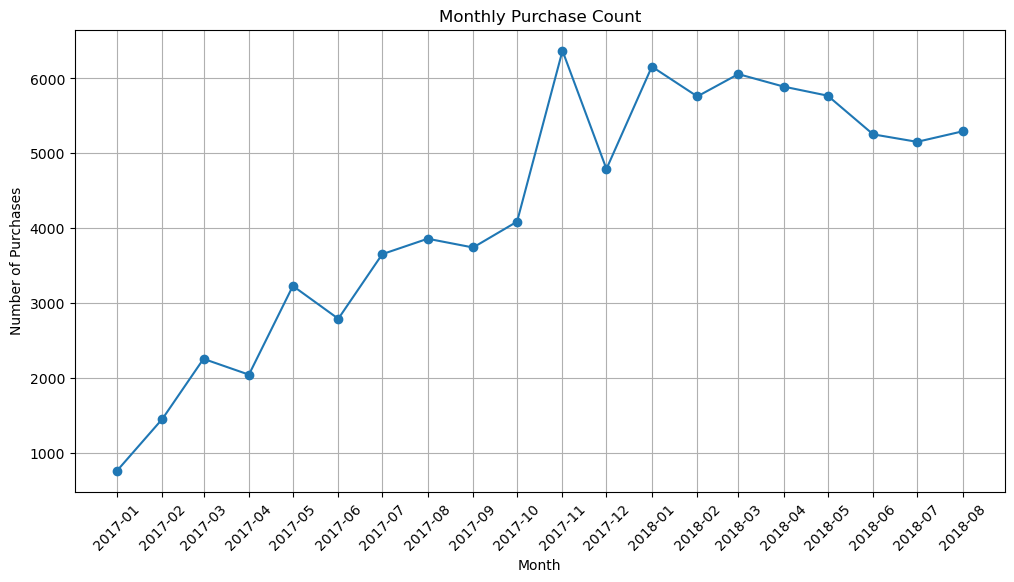

In [63]:
monthly_counts = orders.groupby(orders['order_purchase_timestamp'].dt.to_period('M')).size()

plt.figure(figsize=(12,6))
plt.plot(monthly_counts.index.to_timestamp(), monthly_counts.values, marker='o', linestyle='-')

plt.title("Monthly Purchase Count")
plt.xlabel("Month")
plt.ylabel("Number of Purchases")
plt.grid(True)
plt.xticks(ticks=monthly_counts.index.to_timestamp(), labels=monthly_counts.index.to_timestamp().strftime('%Y-%m'), rotation=45)

# plt.tight_layout()
plt.show()

The line plot clearly shows a big spike in purchases around November 2017 (around 1.5 times the last month), followed by a small dip in December and then **consistently high activity through early 2018**, which was followed by a slow decrease in purchases.  This suggests a surge in demand during **Brazil’s festive season & Carnival** and dry/summer season, which is during January to March. Also, the November spike could also be the result of **Black Friday**, and upcoming holidays like **Christmas & New Year**. The **slow decrease** in purchases can be **due to rainy season**, as logistics are affected. The trend points to a strong seasonal influence, possibly tied to local holidays, marketing pushes, or year-end shopping behaviors.

---
#### Delivery Time Analysis